# Coursera Capstone Project:-  Predicting Accident Severity in Seattle
### Applied Data Science Capstone by IBM&Coursera

## Table of contents
* [Business Problem](#problem)
* [Data](#data)
* [Methodology](#methodology)
* [Result](#result)
* [Conclusion](#conclusion)

## 1. Business Problem <a name="problem"></a>

In USA more than **six million** car accidents occur each year and according to **NHTSA(National Highway Traffic Safety Administration)**, about **6%** of all motor vehicle accidents in the United States result in atleast one death. According to **Wikipedia** 6277 pedestrians were killed in traffic in 2018 int the US.

What if we could forecast the severity of an accident before hand? What if we predict the chances/possibility that an accident can occur dependng upon road condition, weather condition, traffic at a certain place ,etc. ? What if we can say that today there might be X percentage of chances that accident may occur.

In this project we will try to predict severity of an accident in Seattle depending upon some conditions using machine learning models. Although this project predicts severity of accident in Seattle, we can also implement this method for any city if we have data of accidents occuring in that city since 5 years. This project can be helpfull to Seatle government

## 2. Data <a name="data"></a>

In this project we have used dataset shared on Coursera. This dataset has a total of 38 columns in which 37 columns are features/attributes and one column is  dependent variable or the value to be predicted. Each row/record in this dataet represents accidents happened in Seattle from 2014 to 2020. Dependent/Target variable in this dataset is **SEVERITYCODE**. It has 2 unique values which corresponds to different levels. 1 for prop damage and 2 for injury.

## 3. Methodology <a name="methodology"></a>

### (i) Data Exploration & Preparation <a name="data_exploration"></a>

Lets prepare our data so that our model can give best results.lets import our dataset into pandas dataframe and have a look at it

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\sutej\Downloads\DS\Data-Collisions.csv",low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Lets see whether our data is balanced or not

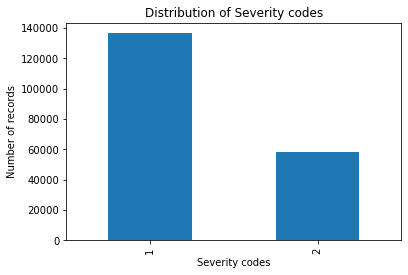

In [2]:
a = df["SEVERITYCODE"].value_counts()
ax = a.plot(kind="bar")
ax.set_ylabel("Number of records")
ax.set_xlabel("Severity codes")
ax.set_title("Distribution of Severity codes")
plt.show()

As we can see records with severity as 1 is much larger than records with severity as 2. So our dataset is unbalanced. There are 2 ways to balance an unbalanced dataset:-
<ul>
<li>Undersamplng</li>
<li>Oversampling</li>
</ul>Undersampling is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.<br>
Oversampling is the process of duplicating examples from the minority class in training dataset and can result in overfitiing for some models.<br>
In our case we will use random undersampling(Random undersampling means randomly deleting examples in majority class)

In [3]:
from sklearn.utils import resample
df_max = df[df["SEVERITYCODE"]==1]
df_min = df[df["SEVERITYCODE"]==2]
df_max_new = resample(df_max,replace=False,n_samples=df_min.shape[0],random_state=42)
balanced_df = pd.concat([df_max_new,df_min])

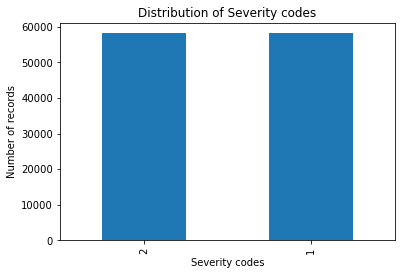

In [4]:
ax = balanced_df["SEVERITYCODE"].value_counts().plot(kind="bar")
ax.set_ylabel("Number of records")
ax.set_xlabel("Severity codes")
ax.set_title("Distribution of Severity codes")
plt.show()

Now our data is balanced we can move further to explore correlation between independent variable and target variable. Attributes which can impact in predicting **SEVERITYCODES** are as follows:-
<ul>
    <li>ROADCOND
    <li>LIGHTCOND
    <li>WEATHER
    <li>UNDERINFL
    <li>ADDRTYPE
</ul>

Below i have defined a function which can check whether 2 columns are independent or not based on **Pearson’s Chi-Squared Test**. If 2 attributes are dependent then it will print that it is dependent and show a bar graph depicting the relationship of those 2 columns or else it just prints independent

In [5]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def relation(col1,col2,balanced_df=balanced_df):
    temp_df = pd.get_dummies(balanced_df[col2],prefix=col2)
    columns = temp_df.columns.values.tolist()
    temp_df = pd.concat([balanced_df,temp_df],axis=1)
    columns.append(col1)
    corr = temp_df[columns].groupby(col1).sum()
    corr_table = corr.values.tolist()
    stat, p, dof, expected = chi2_contingency(corr_table)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('{0} and {1} are Dependent'.format(col1,col2))
        ax = corr.plot(kind="bar",figsize=(10,8))
        ax.set_xlabel(col1,fontsize=14)
        ax.set_xticklabels(corr.index.values.tolist(),fontsize=12)
        ax.set_ylabel("number of accidents",fontsize=14)
        ax.set_title("Correlation between {0} and {1}".format(col1,col2))
        plt.show()
    else:
        print('{0} and {1} are Independent'.format(col1,col2))

Now lets check correlation between **ROADCOND** and **SEVERITYCODE**

ROADCOND and SEVERITYCODE are Dependent


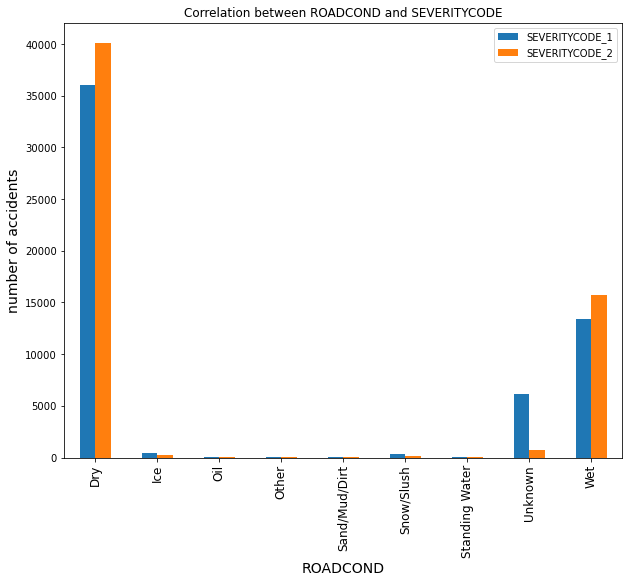

In [6]:
relation("ROADCOND","SEVERITYCODE")

As we can see **ROADCOND** and **SEVERITYCODE** are dependent on each other. Lets check for others too!

LIGHTCOND and SEVERITYCODE are Dependent


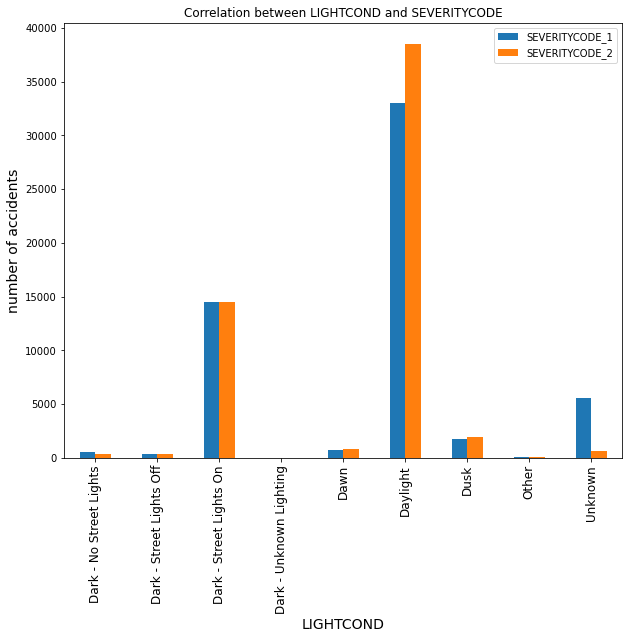

In [8]:
relation("LIGHTCOND","SEVERITYCODE")

WEATHER and SEVERITYCODE are Dependent


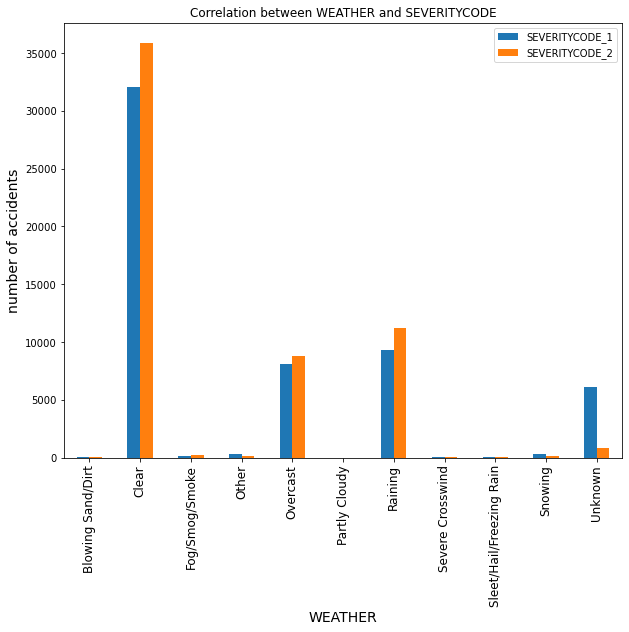

In [8]:
relation("WEATHER","SEVERITYCODE")

ADDRTYPE and SEVERITYCODE are Dependent


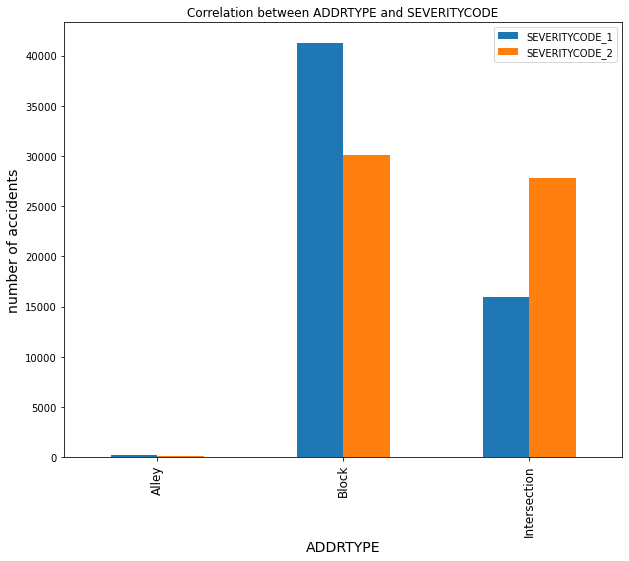

In [9]:
relation("ADDRTYPE","SEVERITYCODE")

UNDERINFL and SEVERITYCODE are Dependent


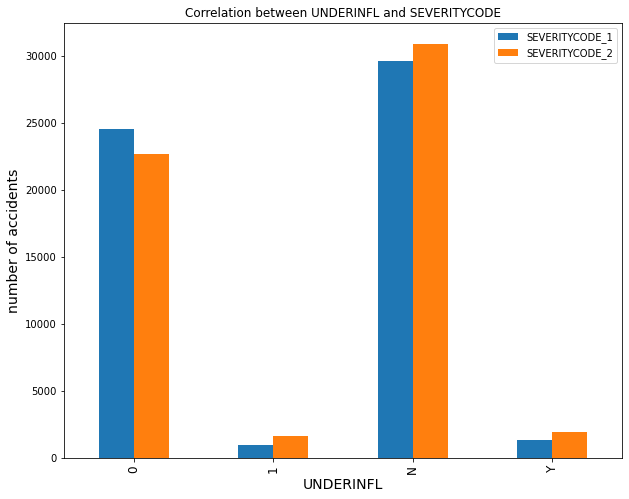

In [10]:
relation("UNDERINFL","SEVERITYCODE")

Look at **UNDERINFL** attribute it has 4 values (N,0,Y,1). We should replace 'N' with '0' ad 'Y' with '1'

UNDERINFL and SEVERITYCODE are Dependent


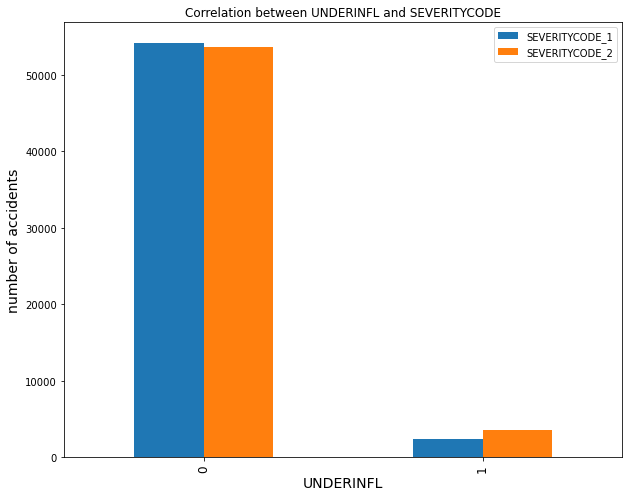

In [9]:
balanced_df = balanced_df[['ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',"SEVERITYCODE"]]
balanced_df = balanced_df.replace(to_replace=["N","Y"],value=["0","1"])
relation("UNDERINFL","SEVERITYCODE",balanced_df=balanced_df)

Lets prepare our data so that our model can give best results. Unfortunately our dataset contains alot NAN(Not A Number) values. First we have to get rid of that.

In [10]:
balanced_df = balanced_df.dropna()
balanced_df.isnull().values.any()

False

Now, lets seperate our dataset into two parts, one contains indepenpent variables and other contains only target variable. Also Sklearn models always expect labels and target values to be a numpy array. So lets change this too!

In [11]:
X = balanced_df[['ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([['Block', '0', 'Clear', 'Dry', 'Unknown'],
       ['Intersection', '0', 'Raining', 'Wet', 'Dark - Street Lights On'],
       ['Intersection', '0', 'Raining', 'Wet', 'Daylight'],
       ['Block', '0', 'Raining', 'Wet', 'Dark - Street Lights On'],
       ['Block', '0', 'Clear', 'Dry', 'Daylight']], dtype=object)

In [12]:
y = balanced_df["SEVERITYCODE"].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

As we can see that there are many categorical variables in our dataset. Sklearn models do not handle categorical variables. Lets convert these features into numerical values using `sklearn.preprocessing.LabelEncoder`

In [13]:
from sklearn import preprocessing
le_addrtype = preprocessing.LabelEncoder()
le_addrtype.fit(balanced_df["ADDRTYPE"].unique().tolist())
X[:,0] = le_addrtype.transform(X[:,0])


le_weather = preprocessing.LabelEncoder()
le_weather.fit(balanced_df["WEATHER"].unique().tolist())
X[:,2] = le_weather.transform(X[:,2])


le_roadcond = preprocessing.LabelEncoder()
le_roadcond.fit(balanced_df["ROADCOND"].unique().tolist())
X[:,3] = le_roadcond.transform(X[:,3])



le_lightcond = preprocessing.LabelEncoder()
le_lightcond.fit(balanced_df["LIGHTCOND"].unique().tolist())
X[:,4] = le_lightcond.transform(X[:,4])

X[0:5]

array([[1, '0', 1, 0, 8],
       [2, '0', 6, 8, 2],
       [2, '0', 6, 8, 5],
       [1, '0', 6, 8, 2],
       [1, '0', 1, 0, 5]], dtype=object)

### (ii) Data Modelling

As we can see that our data is well prepared we can now use **Scikit-learn** algorithms to predict the severity.Here we will use 4 classification models:-
<ul>
    <li>K-Nearest Neighbors
    <li>Decision Trees
    <li>Logistic Regression
    <li>Support Vector Machine(SVM)
</ul>

Let's reserve a part of dataset to test each model for picking up the best. Lets also keep a cross validation set which can be used to select best parameter for each model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [16]:
X_train, X_cv, y_train, y_cv = train_test_split( X_train, y_train, test_size=0.2, random_state=3)

In [17]:
print("training size:- ",X_train.shape)
print("cross validation size:- ",X_cv.shape)
print("test size:- ",X_test.shape)

training size:-  (72051, 5)
cross validation size:-  (18013, 5)
test size:-  (22517, 5)


So we will use training and cross validation set for each model and then test set to detect the best classifier

#### K-Nearest Neighbour

In [21]:
ks=15
training_f1_scores = np.zeros(ks-1)
cv_f1_scores = np.zeros(ks-1)

In [22]:
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train,y_train)
    y_train_hat = neigh.predict(X_train)
    y_cv_hat = neigh.predict(X_cv)
    training_f1_scores[n-1] = f1_score(y_train,y_train_hat)
    cv_f1_scores[n-1] = f1_score(y_cv,y_cv_hat)

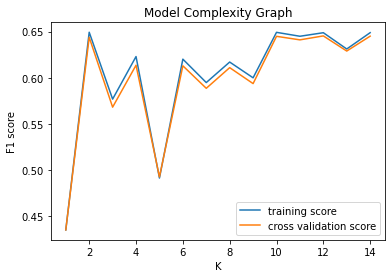

In [29]:
plt.plot(range(1,ks),training_f1_scores,label="training score")
plt.plot(range(1,ks),cv_f1_scores,label="cross validation score")
plt.xlabel("K")
plt.ylabel("F1 score")
plt.legend()
plt.title("Model Complexity Graph")
plt.show()

At k = 11 our model performs best

#### Decision Tree

In [30]:
from sklearn import tree

In [31]:
decision_tree_clf = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree_clf.fit(X_train,y_train)
y_cv_hat = decision_tree_clf.predict(X_cv)
y_cv_hat[:5]

array([2, 1, 2, 1, 1], dtype=int64)

In [32]:
print("f1 score:- ",f1_score(y_cv,y_cv_hat))

f1 score:-  0.632002476013618


#### Support Vector Machine

In [18]:
from sklearn import svm

In [19]:
svm_clf_rbf = svm.SVC(kernel='rbf')
svm_clf_linear = svm.SVC(kernel='linear')
svm_clf_poly = svm.SVC(kernel='poly')
svm_clf_sigmoid = svm.SVC(kernel='sigmoid')

In [20]:
svm_clf_rbf.fit(X_train, y_train) 
svm_clf_linear.fit(X_train, y_train)
svm_clf_poly.fit(X_train, y_train)
svm_clf_sigmoid.fit(X_train, y_train)


y_cv_hat_rbf = svm_clf_rbf.predict(X_cv)
y_cv_hat_linear = svm_clf_linear.predict(X_cv)
y_cv_hat_poly = svm_clf_poly.predict(X_cv)
y_cv_hat_sigmoid = svm_clf_sigmoid.predict(X_cv)

In [21]:
print("f1 score of svm with kernel as rbf:- ",f1_score(y_cv,y_cv_hat_rbf))
print("f1 score of svm with kernel as linear:- ",f1_score(y_cv,y_cv_hat_linear))
print("f1 score of svm with kernel as poly:- ",f1_score(y_cv,y_cv_hat_poly))
print("f1 score of svm with kernel as sigmoid:- ",f1_score(y_cv,y_cv_hat_sigmoid))

f1 score of svm with kernel as rbf:-  0.6374668570263105
f1 score of svm with kernel as linear:-  0.6318351284175642
f1 score of svm with kernel as poly:-  0.6381197357139254
f1 score of svm with kernel as sigmoid:-  0.5065723548482168


#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [24]:
y_cv_hat = log_reg.predict(X_cv)
print("f1 score:- ",f1_score(y_cv,y_cv_hat))

f1 score:-  0.6306074043518614


## 4. Result <a name="result"></a>

In this phase we will try to find out which model best fits our data using testing set

In [26]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [28]:
neigh = KNeighborsClassifier(n_neighbors = 11)
neigh.fit(X_train,y_train)
y_test_hat = neigh.predict(X_test)
print("f1 score for KNN Classifier:- ", f1_score(y_test,y_test_hat))
print("jacard score for KNN Classifier:- ",jaccard_score(y_test,y_test_hat))

f1 score for KNN Classifier:-  0.6416072125794201
jacard score for KNN Classifier:-  0.4723281944081526


In [34]:
y_test_hat = decision_tree_clf.predict(X_test)
print("f1 score for Decision Tree Classifier:- ", f1_score(y_test,y_test_hat))
print("jacard score for Decision Tree Classifier:- ",jaccard_score(y_test,y_test_hat))

f1 score for Decision Tree Classifier:-  0.6372875776653087
jacard score for Decision Tree Classifier:-  0.4676610906455704


In [35]:
y_test_hat = svm_clf_poly.predict(X_test)
print("f1 score for SVM Classifier:- ", f1_score(y_test,y_test_hat))
print("jacard score SVM Classifier:- ",jaccard_score(y_test,y_test_hat))

f1 score for SVM Classifier:-  0.6422535211267605
jacard score SVM Classifier:-  0.4730290456431535


In [37]:
y_test_hat = log_reg.predict(X_test)
print("f1 score for Logistic Regression:- ", f1_score(y_test,y_test_hat))
print("jacard score Logistic Regression:- ",jaccard_score(y_test,y_test_hat))

from sklearn.metrics import log_loss
print("log loss:- ",log_loss(y_test,y_test_hat))

f1 score for Logistic Regression:-  0.637160133273004
jacard score Logistic Regression:-  0.4675238440178679
log loss:-  16.96376830391694


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.472   | 0.641    | NA      |
| Decision Tree      | 0.467   | 0.637    | NA      |
| SVM                | 0.473   | 0.642    | NA      |
| LogisticRegression | 0.467   | 0.637    | 16.96   |

As we can see that SVM classifier with kernel as polynomial gives highest results among other algorithms. Overall only 63.9 percent(average) of variance is predicted by these models. This is actually low score. It can be due to  ignoring other features such as **INATTENTIONIND**,**INCDTTM**,**INCDATE** and **SPEEDING**. Features such as **INATTENTIONIND**  and **SPEEDING**was ignored because it has many nan values nearly 75 percent of it are NAN values and ther is no alternative value which can be replaced with NAN values. Other features such as **INCDTTM** and **INCDATE** are not inculded because of simplicity. There will be a relationship between **SEVERITY** and **INCDTTM**. But inorder to use this feature we have to process and categorize these in to 5 different categories(Morning, Afternoon, Evening , Night and Midnight).**INCDATE** can be categorized into 4 seasons(Summer, Fall, Winter, Spring). Another reason could be that our dataset has only 2 labels. If we could have more labels then our models would have learnt more.

## 4. Conclusion <a name="conclusion"></a>

As stated earlier in introduction part; can we predict an accident before hand given some features? Answer is yes we can. If more data is given and we put little more effort on data wrangling we can get good results and we can use these models to predict the possibility of an accident on a given day. This could very helpful to government and also some private sectors like Google maps. 